In [2]:
#Import libraries

import pandas as pd
import numpy as np
from collections import Counter


In [3]:
#Import the data 

movie_df = pd.read_csv('/Users/markdetiberiis/MovieMonths/clean_movie_info.csv')




In [4]:
movie_df.head()

,Unnamed: 0,Unnamed: 0.1,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year
0,0,0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,26,45000000,0,73706,Dec,31,2012
1,1,1,tt0326592,The Overnight,88.0,NaN,7.5,24,21,200000,1109808,1165996,Jun,19,2015
2,2,2,tt3844362,The Overnight,79.0,"Comedy,Mystery",6.1,14828,21,200000,1109808,1165996,Jun,19,2015
3,3,3,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,17,25000000,720828,9313302,Mar,22,2013
4,4,4,tt4339118,On the Road,89.0,Drama,6.0,6,17,25000000,720828,9313302,Mar,22,2013


In [19]:
movie_df.groupby(['release_month','total_profit']).primary_title.head()



0          Foodfight!
1       The Overnight
2       The Overnight
3         On the Road
4         On the Road
            ...      
2870      Richard III
2871           Heroes
2872             Push
2873        Unplanned
2874    The Terrorist
Name: primary_title, Length: 2824, dtype: object

In [6]:
#sort list by highest worldwide gross and output just the  film name 


In [18]:
movie_df.sort_values(['total_profit'], ascending=[False])

,Unnamed: 0,Unnamed: 0.1,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year,total_profit
1279,1279,1279,tt1775309,Avatar,93.0,Horror,6.1,43,1,425000000,760507625,2776345279,Dec,18,2009,2351345279
2057,2057,2057,tt2495766,Titanic,NaN,Adventure,6.2,20,43,200000000,659363944,2208208395,Dec,19,1997,2008208395
2538,2538,2538,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,7,300000000,678815482,2048134200,Apr,27,2018,1748134200
8,8,8,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,215000000,652270625,1648854864,Jun,12,2015,1433854864
2190,2190,2190,tt2820852,Furious 7,137.0,"Action,Crime,Thriller",7.2,335074,67,190000000,353007020,1518722794,Apr,3,2015,1328722794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,2546,2546,tt4192918,The Promise,NaN,Comedy,8.8,53,78,90000000,8224288,10551417,Apr,21,2017,-79448583
2548,2548,2548,tt6072400,The Promise,90.0,Thriller,5.8,8,78,90000000,8224288,10551417,Apr,21,2017,-79448583
2719,2719,2719,tt5519340,Bright,117.0,"Action,Crime,Fantasy",6.4,147834,80,90000000,0,0,Dec,13,2017,-90000000
469,469,469,tt1305591,Mars Needs Moms,88.0,"Adventure,Animation,Family",5.4,19823,94,150000000,21392758,39549758,Mar,11,2011,-110450242


In [9]:
#calculate total profits for each new movie and save in a new column

movie_df['total_profit']= movie_df['worldwide_gross'] - movie_df['production_budget']


In [10]:
movie_df.head()


,Unnamed: 0,Unnamed: 0.1,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year,total_profit
0,0,0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,26,45000000,0,73706,Dec,31,2012,-44926294
1,1,1,tt0326592,The Overnight,88.0,NaN,7.5,24,21,200000,1109808,1165996,Jun,19,2015,965996
2,2,2,tt3844362,The Overnight,79.0,"Comedy,Mystery",6.1,14828,21,200000,1109808,1165996,Jun,19,2015,965996
3,3,3,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,17,25000000,720828,9313302,Mar,22,2013,-15686698
4,4,4,tt4339118,On the Road,89.0,Drama,6.0,6,17,25000000,720828,9313302,Mar,22,2013,-15686698


In [11]:

movie_df.sort_values('total_profit', ascending = False)['release_month'].head(100)


1279    Dec
2057    Dec
2538    Apr
8       Jun
2190    Apr
       ... 
2683    Jul
1781    Dec
1525    Nov
718     Mar
717     Mar
Name: release_month, Length: 100, dtype: object

In [12]:
movies_sorted = movie_df.sort_values('total_profit', ascending = False)['release_month']



In [13]:
sorted_months_df = pd.DataFrame(movies_sorted)
sorted_months_df.head

<bound method NDFrame.head of      release_month
1279           Dec
2057           Dec
2538           Apr
8              Jun
2190           Apr
...            ...
2546           Apr
2548           Apr
2719           Dec
469            Mar
2816           Jun

[2875 rows x 1 columns]>

In [14]:
sorted_months_df

,release_month
1279,Dec
2057,Dec
2538,Apr
8,Jun
2190,Apr
...,...
2546,Apr
2548,Apr
2719,Dec
469,Mar


In [17]:
#Show number of movies for each month 

sorted_months_df['release_month'].value_counts().head(12)

Dec    375
Oct    271
Sep    247
Apr    244
Mar    241
Nov    237
Aug    235
Jun    235
Jul    213
Feb    205
May    190
Jan    182
Name: release_month, dtype: int64

In [16]:
#save number of movies released in each month 

movies_in_jan = sorted_months_df['release_month'].value_counts().head(12)['Jan']
movies_in_feb = sorted_months_df['release_month'].value_counts().head(12)['Feb']
movies_in_mar = sorted_months_df['release_month'].value_counts().head(12)['Mar']
movies_in_apr = sorted_months_df['release_month'].value_counts().head(12)['Apr']
movies_in_may = sorted_months_df['release_month'].value_counts().head(12)['May']
movies_in_jun = sorted_months_df['release_month'].value_counts().head(12)['Jun']
movies_in_july = sorted_months_df['release_month'].value_counts().head(12)['Jul']
movies_in_aug = sorted_months_df['release_month'].value_counts().head(12)['Aug']
movies_in_sep = sorted_months_df['release_month'].value_counts().head(12)['Sep']
movies_in_oct = sorted_months_df['release_month'].value_counts().head(12)['Oct']
movies_in_nov = sorted_months_df['release_month'].value_counts().head(12)['Nov']
movies_in_dec = sorted_months_df['release_month'].value_counts().head(12)['Dec']


In [140]:
#Basic Visualizations to get a feel for the data 
months_total_profit = movie_df.groupby(by = 'release_month',axis = 0).total_profit.sum()



In [168]:
months_total_profit_df= pd.DataFrame(months_total_profit)
#months_total_profit_df.head


In [133]:
movie_df.sort_values('release_month',axis = 0, ascending = False).total_profit.sum()


197077725735

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [167]:
#generate figure 
y = months_total_profit_df.total_profit
x = y.index

#need to calc the total profits of all movies in each month 

fig, ax = plt.subplots(figsize = (10,10))



In [156]:
ax.bar(x,y)

ax.set_title('Most Profitable Month to Premier')
#axes.set_xlabel('Month')
ax.set_ylabel('x $1000000000');
ax.set_ylim(bottom=0, top=None, emit=True, auto=False, ymax=None)

(0.0, 28949737703.25)

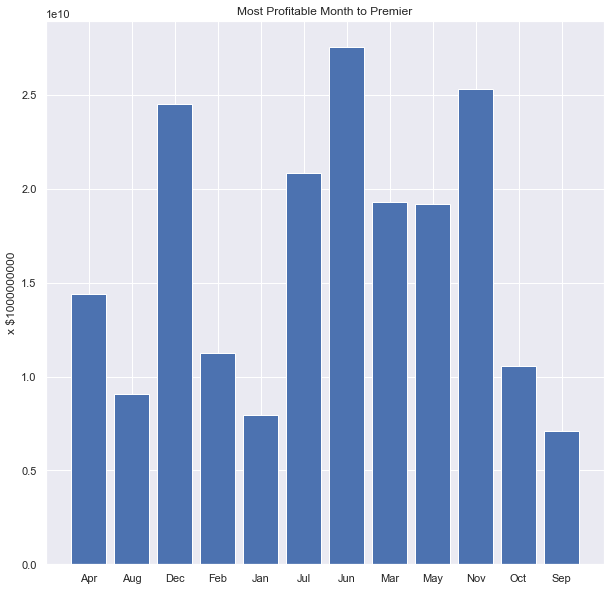

In [157]:
#Visualize most profitable month to Premier 

fig                                                              


In [158]:
days_total_profit = movie_df.groupby(by = 'release_day',axis = 0).total_profit.sum()


In [166]:
days_total_profit_df= pd.DataFrame(days_total_profit)
#days_total_profit_df.head


In [169]:
#Initialize graph 2
y2 = days_total_profit_df.total_profit
x2 = y2.index

#figure, axes = plt.subplots(figsize = (10,10))

In [163]:
#Find best day of the month to premier 

axes.bar(x2,y2)

axes.set_title('Most Profitable Day of the Month to Premier')
axes.set_xlabel('Days of the Month')
axes.set_ylabel('Profits');
axes.set_ylim(bottom=0, top=None, emit=True, auto=False, ymax=None)

(0.0, 13340553863.7)

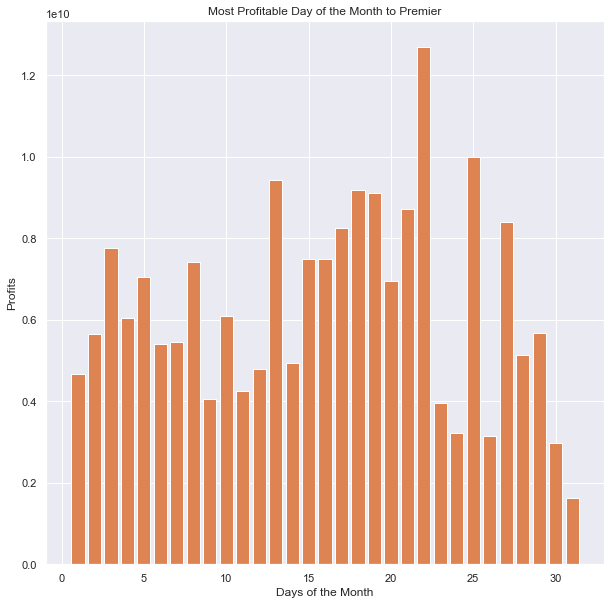

In [164]:
#Visualize most profitable month to Premier 

figure

In [ ]:
#June 22 is the best day to come out with a movie epsecially if that 
#lands on a friday 


In [ ]:
#want to find what genre does the best 
